Loaded data from dialogues_with_sentiment.csv
Generating Plot 1: Sentiment Distribution per Film...


/var/folders/7p/gw8b3jp13yq68gtfjvvl7v_m0000gn/T/ipykernel_25591/1856257769.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Film')


<Figure size 1200x800 with 0 Axes>

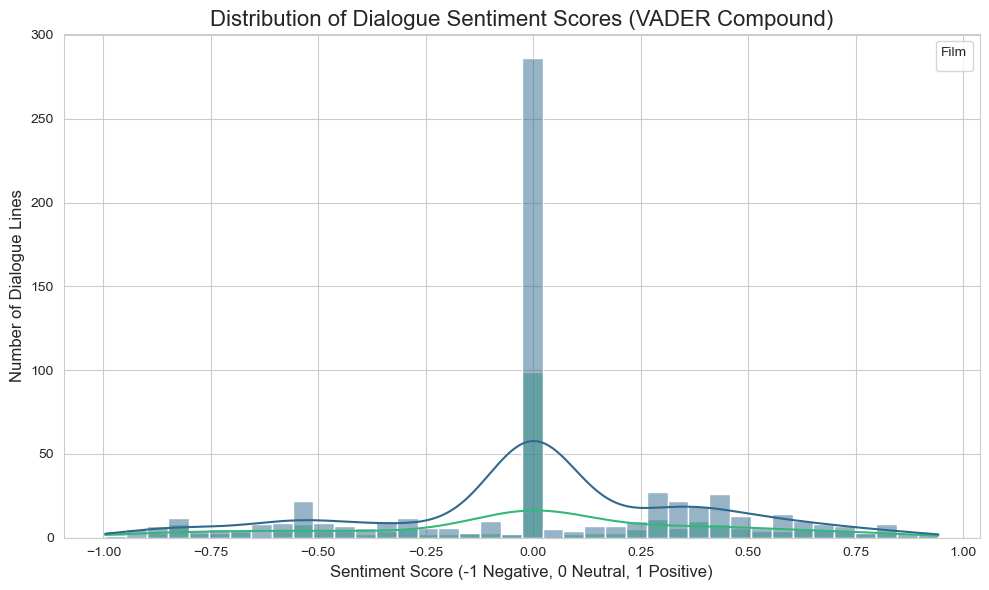

Generating Plot 2: Average Sentiment per Character...


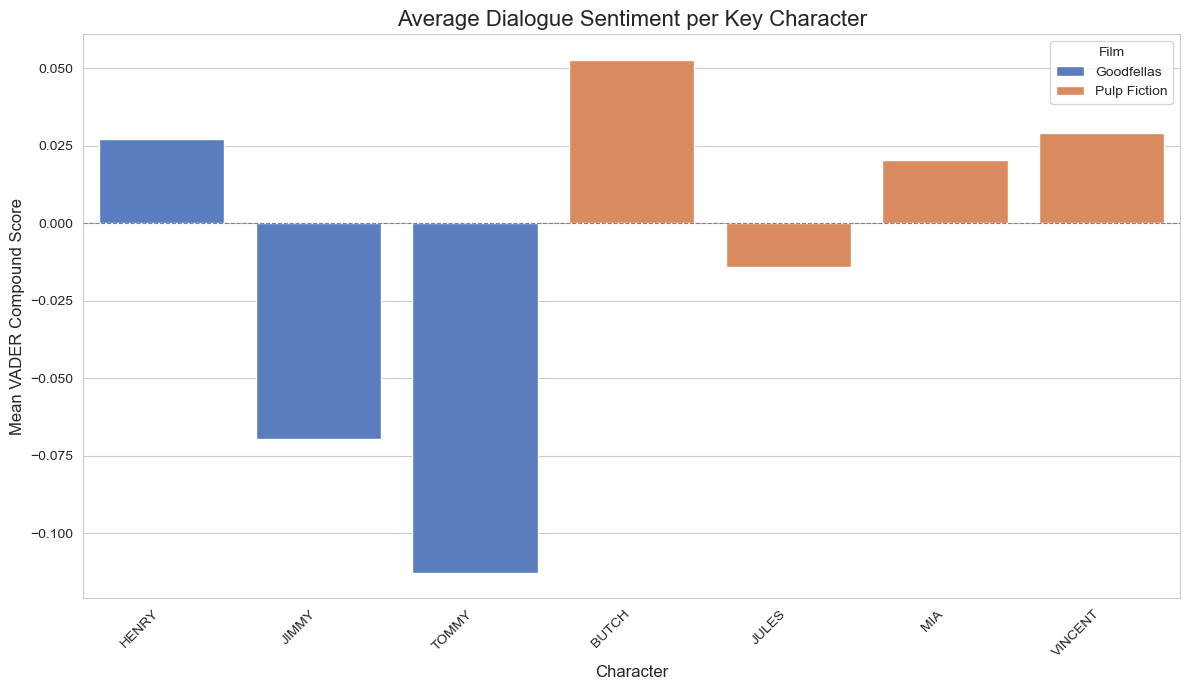

Generating Plot 3: Sentiment Distribution per Character...


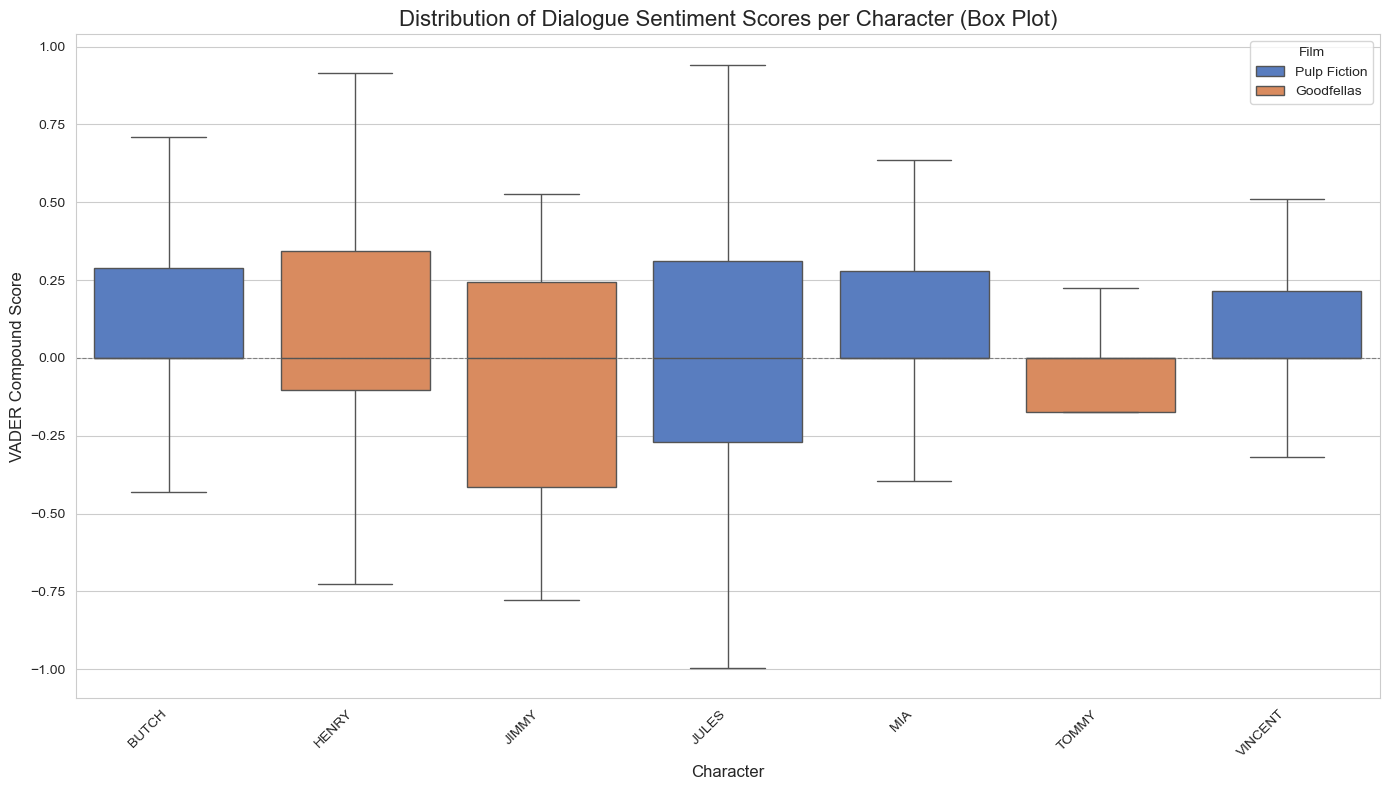

Generating Plot 4: Dialogue Counts per Character...


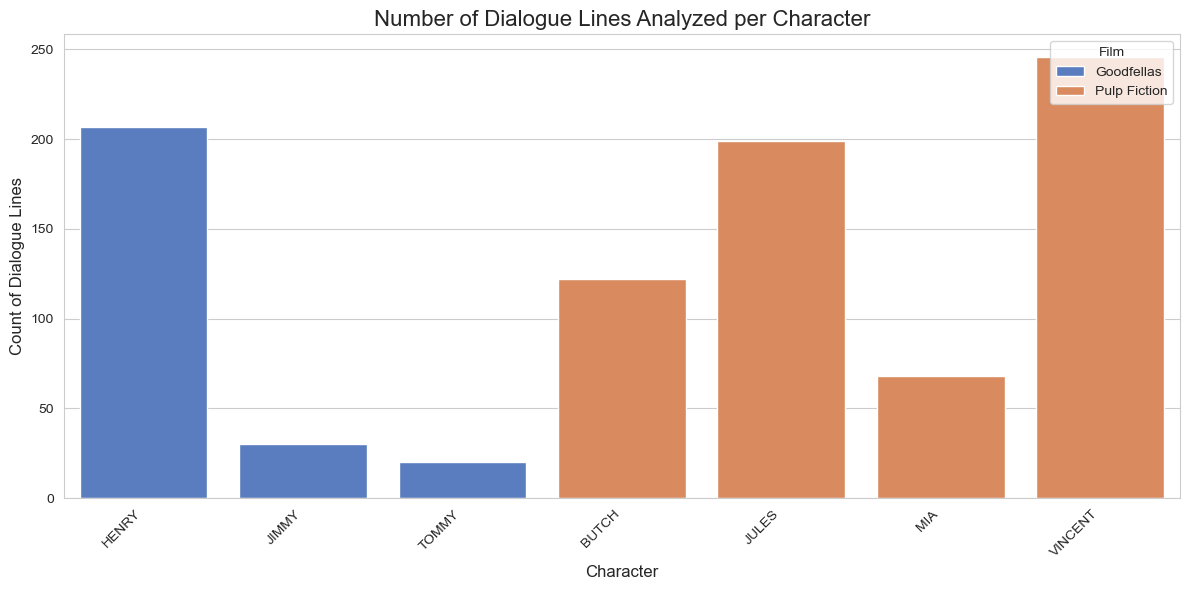


Categorizing sentiment scores...
Sentiment categorization complete.
           film character  sentiment_score sentiment_category
0  Pulp Fiction     JULES           0.2263           Positive
1  Pulp Fiction   VINCENT           0.1477           Positive
2  Pulp Fiction     JULES           0.3818           Positive
3  Pulp Fiction   VINCENT           0.6428           Positive
4  Pulp Fiction     JULES           0.0000            Neutral

Generating Plot 5 & 6: Sentiment Distribution for Each Film...


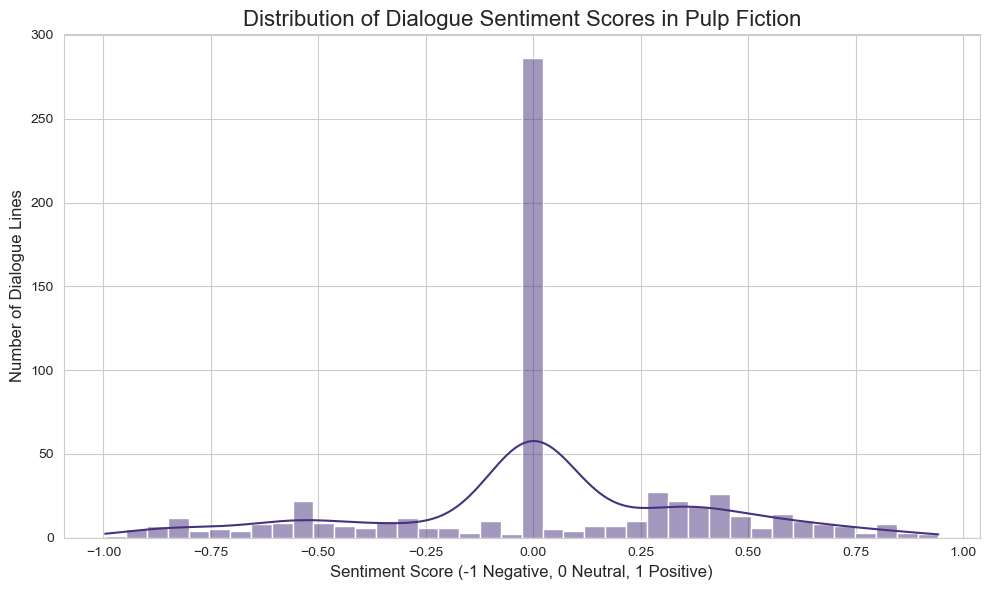

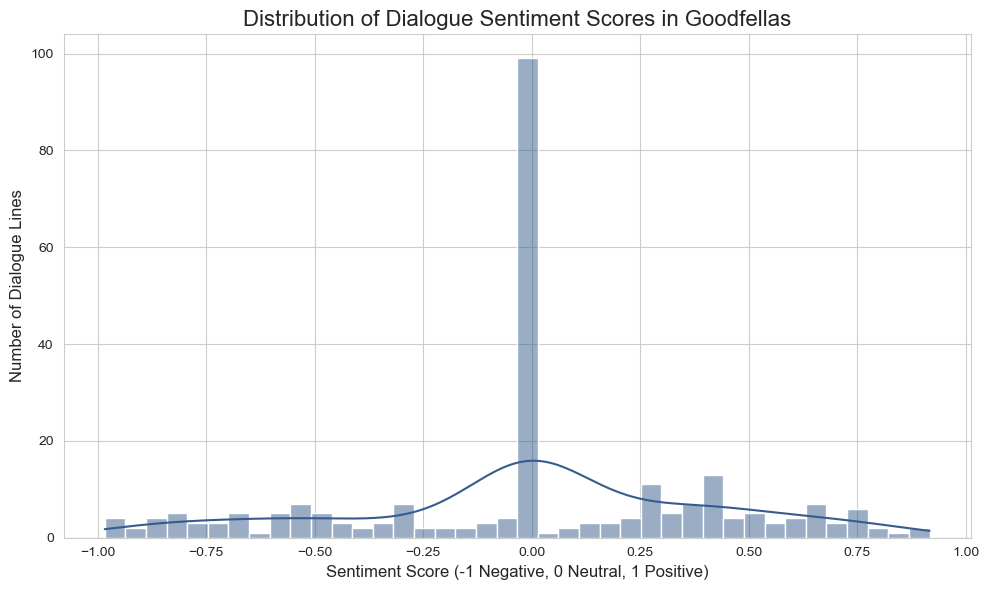


Generating Plot 7 & 8: Character Sentiment Breakdown per Film...


<Figure size 1000x700 with 0 Axes>

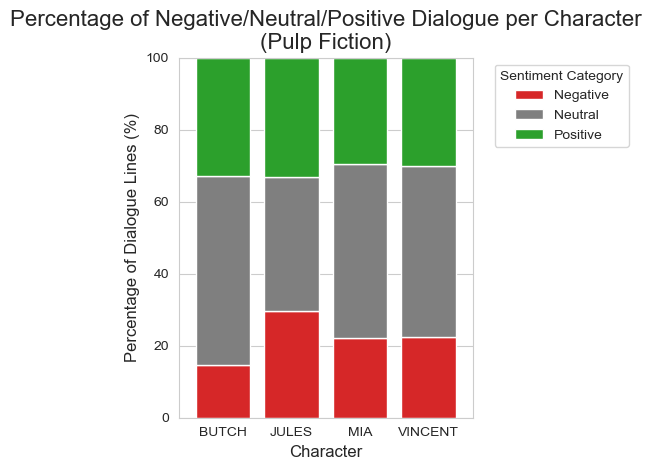

<Figure size 1000x700 with 0 Axes>

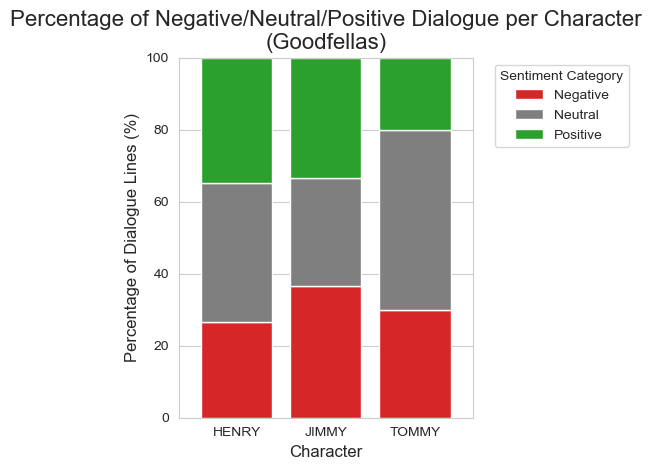


Generating Plot 9: Overall Film Sentiment Breakdown (Pie Charts)...


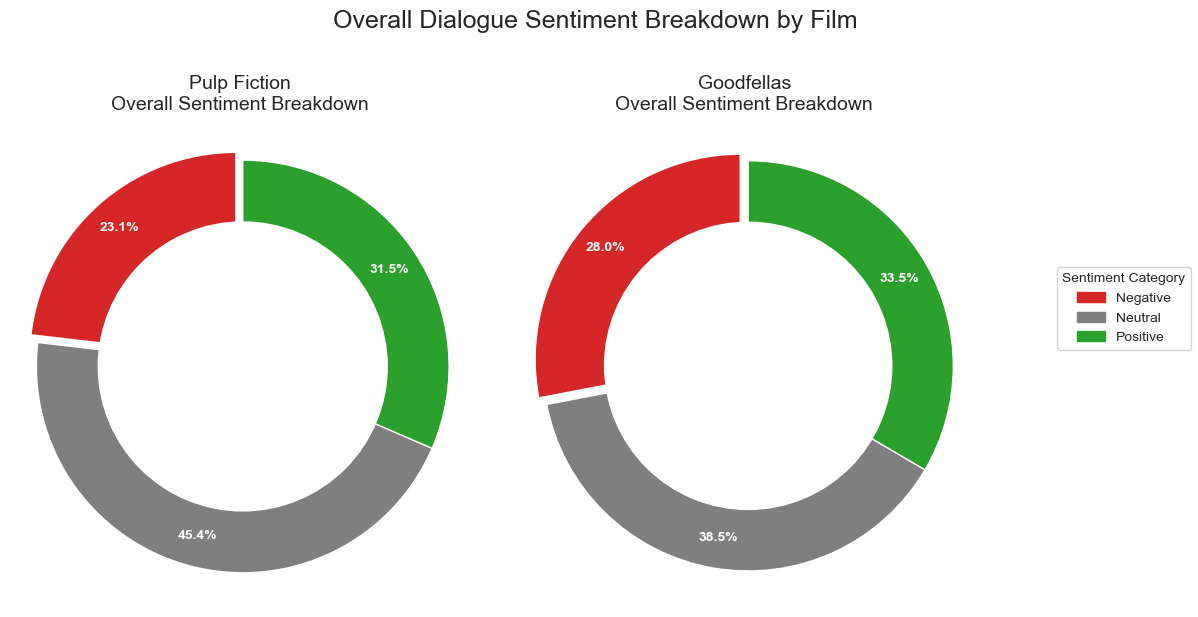

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dialogues_with_sentiment.csv')
# Re-calculate character_stats if loading from CSV
character_stats = df.groupby(['film', 'character'])['sentiment_score'].agg(['mean', 'median', 'std', 'count'])
character_stats.rename(columns={'mean': 'Mean Sentiment', 'median': 'Median Sentiment', 'std': 'Std Dev Sentiment', 'count': 'Dialogue Count'}, inplace=True)
print("Loaded data from dialogues_with_sentiment.csv")


# --- Ensure DataFrames Exist ---
if 'df' not in locals() or 'character_stats' not in locals():
    print("Error: DataFrame 'df' or 'character_stats' not found. Please run the previous steps.")
    exit()
elif df.empty:
    print("Error: DataFrame 'df' is empty.")
    exit()

# --- Set Plot Style (Optional) ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # Default size for subsequent plots unless overridden

# --- Plot 1: Distribution of Sentiment Scores per Film ---
print("Generating Plot 1: Sentiment Distribution per Film...")
plt.figure(figsize=(10, 6)) # Adjust size for this specific plot
sns.histplot(data=df, x='sentiment_score', hue='film', kde=True, bins=40, palette='viridis')
plt.title('Distribution of Dialogue Sentiment Scores (VADER Compound)', fontsize=16)
plt.xlabel('Sentiment Score (-1 Negative, 0 Neutral, 1 Positive)', fontsize=12)
plt.ylabel('Number of Dialogue Lines', fontsize=12)
plt.legend(title='Film')
plt.tight_layout()
plt.show()

# --- Plot 2: Average Sentiment per Character ---
print("Generating Plot 2: Average Sentiment per Character...")
# Reset index of character_stats to make 'film' and 'character' columns
char_stats_plot = character_stats.reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=char_stats_plot, x='character', y='Mean Sentiment', hue='film', palette='muted')
# Add a horizontal line at y=0 for reference
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Average Dialogue Sentiment per Key Character', fontsize=16)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Mean VADER Compound Score', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Film', loc='upper right')
plt.tight_layout()
plt.show()

# --- Plot 3: Sentiment Distribution per Character (Box Plot) ---
print("Generating Plot 3: Sentiment Distribution per Character...")
# Define a consistent order for characters if desired
character_order = sorted(df['character'].unique())

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='character', y='sentiment_score', hue='film', order=character_order, palette='muted', showfliers=False) # showfliers=False hides outliers for cleaner look initially
# You can also try violinplot:
# sns.violinplot(data=df, x='character', y='sentiment_score', hue='film', order=character_order, palette='muted', inner='quartile')

plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Distribution of Dialogue Sentiment Scores per Character (Box Plot)', fontsize=16)
plt.xlabel('Character', fontsize=12)
plt.ylabel('VADER Compound Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Film', loc='upper right')
plt.tight_layout()
plt.show()

# --- Plot 4: Number of Dialogues per Character ---
print("Generating Plot 4: Dialogue Counts per Character...")
plt.figure(figsize=(12, 6))
sns.barplot(data=char_stats_plot, x='character', y='Dialogue Count', hue='film', palette='muted')
plt.title('Number of Dialogue Lines Analyzed per Character', fontsize=16)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Count of Dialogue Lines', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Film', loc='upper right')
plt.tight_layout()
plt.show()

# --- 1. Categorize Sentiment Scores ---
print("\nCategorizing sentiment scores...")

def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

print("Sentiment categorization complete.")
print(df[['film', 'character', 'sentiment_score', 'sentiment_category']].head())

# Define colors for consistency
sentiment_colors = {'Negative': '#d62728', 'Neutral': '#7f7f7f', 'Positive': '#2ca02c'} # Red, Grey, Green
category_order = ['Negative', 'Neutral', 'Positive'] # Consistent order


# --- 2. Sentiment Distribution Plots per Film (Separate) ---
print("\nGenerating Plot 5 & 6: Sentiment Distribution for Each Film...")

films = df['film'].unique()
for film_name in films:
    plt.figure(figsize=(10, 6))
    film_data = df[df['film'] == film_name]
    sns.histplot(data=film_data, x='sentiment_score', kde=True, bins=40, color=sns.color_palette("viridis")[films.tolist().index(film_name)]) # Use different color per film
    plt.title(f'Distribution of Dialogue Sentiment Scores in {film_name}', fontsize=16)
    plt.xlabel('Sentiment Score (-1 Negative, 0 Neutral, 1 Positive)', fontsize=12)
    plt.ylabel('Number of Dialogue Lines', fontsize=12)
    plt.tight_layout()
    plt.show()


# --- 3. Character Sentiment Breakdown (Stacked Bar Charts per Film) ---
print("\nGenerating Plot 7 & 8: Character Sentiment Breakdown per Film...")

for film_name in films:
    plt.figure(figsize=(10, 7))
    film_data = df[df['film'] == film_name]

    # Calculate counts per character and category
    char_sentiment_counts = film_data.groupby(['character', 'sentiment_category']).size().unstack(fill_value=0)

    # Ensure all categories are present and in order
    char_sentiment_counts = char_sentiment_counts.reindex(columns=category_order, fill_value=0)

    # Calculate percentages
    char_sentiment_perc = char_sentiment_counts.apply(lambda x: x * 100 / x.sum(), axis=1)

    # Plot stacked bar chart
    ax = char_sentiment_perc.plot(kind='bar', stacked=True, color=[sentiment_colors[cat] for cat in category_order], width=0.8)

    plt.title(f'Percentage of Negative/Neutral/Positive Dialogue per Character\n({film_name})', fontsize=16)
    plt.xlabel('Character', fontsize=12)
    plt.ylabel('Percentage of Dialogue Lines (%)', fontsize=12)
    plt.xticks(rotation=0) # Keep character names horizontal
    plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Legend outside plot
    plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100

    # Add percentage labels inside bars (optional, can be cluttered)
    # for container in ax.containers:
    #     ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, color='white', weight='bold')

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()


# --- 4. Overall Film Sentiment Pie Charts ---
print("\nGenerating Plot 9: Overall Film Sentiment Breakdown (Pie Charts)...")

# Calculate overall counts per film and category
film_sentiment_counts = df.groupby(['film', 'sentiment_category']).size().unstack(fill_value=0)
film_sentiment_counts = film_sentiment_counts.reindex(columns=category_order, fill_value=0)


fig, axes = plt.subplots(1, len(films), figsize=(12, 6), squeeze=False) # Ensure axes is always 2D

for i, film_name in enumerate(films):
    ax = axes[0, i] # Access subplot axis
    counts = film_sentiment_counts.loc[film_name]
    labels = counts.index
    sizes = counts.values
    colors = [sentiment_colors[cat] for cat in labels]

    # Explode the 'Negative' slice slightly if desired
    explode = tuple(0.05 if cat == 'Negative' else 0 for cat in labels)

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                      startangle=90, pctdistance=0.85, explode=explode,
                                      textprops={'color':"w", 'weight':'bold'}) # White text inside

    # Draw circle for Donut Chart look (optional)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)

    ax.set_title(f'{film_name}\nOverall Sentiment Breakdown', fontsize=14)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend to the figure
handles = [plt.Rectangle((0,0),1,1, color=sentiment_colors[cat]) for cat in category_order]
fig.legend(handles, category_order, title="Sentiment Category", loc="center right")


plt.suptitle('Overall Dialogue Sentiment Breakdown by Film', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for figure legend
plt.show()

